In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# imports to visualize tree
from sklearn import tree as treeViz
import graphviz
# import pydotplus
from IPython.display import display

In [53]:
# load data
%run new_preprocess.ipynb
def split(X, y, test_size, val_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_size/(1-test_size), random_state=1)

    return X_train, y_train, X_val, y_val, X_test, y_test

df = pd.read_csv('cleaned_extracted_data.csv')
df = df.drop('Unnamed: 0', axis=1)
X = df.drop('shares', axis=1)
y = df['shares']
print(f"X shape: {X.shape}", f"y shape: {y.shape}")
print(X.head())
X_train, y_train, X_val, y_val, X_test, y_test = split(X, y, 0.1, 0.3)
print(f"X_train shape: {X_train.shape}", f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}", f"y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}", f"y_test shape: {y_test.shape}")



X shape: (12600, 30) y shape: (12600,)
   n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0        0.947707         -0.439662         0.428161          0.002998   
1       -0.684112         -0.329189        -0.117285         -0.230132   
2       -0.684112         -0.488761        -0.049791         -0.040442   
3       -0.140172          0.315234        -1.027334         -0.225009   
4        1.491646         -0.200305        -0.756442          0.313212   

   n_non_stop_unique_tokens  num_hrefs  num_imgs  num_videos  \
0                 -0.418972  -0.324104 -0.313340         0.0   
1                 -0.319133  -0.584280 -0.313340         0.0   
2                 -0.568731  -0.584280 -0.313340         0.0   
3                  0.296542  -0.454192  0.058349         0.0   
4                 -0.244254  -0.844455 -0.313340         0.0   

   average_token_length  weekday_is_monday  ...  global_rate_negative_words  \
0             -0.186062                  1  ...     

In [39]:
# Creating a DecisionTreeRegressor model
from sklearn import tree
from sklearn.metrics import mean_squared_error
regression_tree = tree.DecisionTreeRegressor(criterion="friedman_mse", splitter="best", max_depth=10, min_samples_split=2, min_samples_leaf=1)
regression_tree.fit(X_train, y_train)
# Make predictions on the test set
y_pred = regression_tree.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_pred)

# Print the training and validation scores (accuracy)
print("Training Accuracy:", regression_tree.score(X_train, y_train))
print("Validation Accuracy:", regression_tree.score(X_val, y_val))
print("Validation Mean Squared Error:", mse)



Training Accuracy: 0.8126680910337603
Validation Accuracy: -0.19421252132174427
Validation Mean Squared Error: 1.0562355309276046


In [40]:
print("Mean Squared Error:", mse)
print("R2 Score:", regression_tree.score(X_val, y_val))
print("Feature Importances:", regression_tree.feature_importances_)
print("Number of Outputs:", regression_tree.n_outputs_)
print("Number of Nodes:", regression_tree.tree_.node_count)
print("Max Depth:", regression_tree.tree_.max_depth)
print("Min Samples Split:", regression_tree.min_samples_split)
print("Min Samples Leaf:", regression_tree.min_samples_leaf)

Mean Squared Error: 1.0562355309276046
R2 Score: -0.19421252132174427
Feature Importances: [4.19496168e-03 2.45055448e-02 5.79074672e-03 5.16818507e-03
 2.23195065e-02 9.23121791e-02 1.31817144e-02 0.00000000e+00
 6.76898639e-02 0.00000000e+00 4.17567547e-03 0.00000000e+00
 4.91053203e-05 1.62467598e-03 6.52469889e-05 0.00000000e+00
 1.44831001e-03 3.43903873e-02 3.84977448e-03 2.54071645e-03
 4.44359203e-03 1.39801296e-05 1.24051245e-03 6.53454345e-01
 3.75344224e-03 2.77520562e-02 6.31563413e-03 2.81265155e-04
 1.64652669e-02 2.97331208e-03]
Number of Outputs: 1
Number of Nodes: 247
Max Depth: 10
Min Samples Split: 2
Min Samples Leaf: 1


In [ ]:
def hyperparameter_tune_grid_search(criterion, min_samples_split, splitter, max_depth, X_train, y_train, X_val, y_val):
    """Tune hyperparameters using grid search. Return the best score and the best parameters.
    param criterion: list of strings, the function to measure the quality of a split
    param min_samples_split: list of integers, the minimum number of samples required to split an internal node
    param splitter: list of strings, the strategy used to choose the split at each node
    param max_depth: list of integers, the maximum depth of the tree
    param X_train: array-like, the training input samples
    param y_train: array-like, the target values"""
    best_score = 0
    best_params = {}
    for c in criterion:
        for mss in min_samples_split:
            for s in splitter:
                for md in max_depth:
                    regression_tree = tree.DecisionTreeRegressor(criterion=c, splitter=s, max_depth=md, min_samples_split=mss, min_samples_leaf=1)
                    regression_tree.fit(X_train, y_train)
                    score = regression_tree.score(X_val, y_val)
                    mse = mean_squared_error(y_val, y_pred)
                    if score > best_score:
                        best_score = score
                        best_params = {"criterion": c, "min_samples_split": mss, "splitter": s, "max_depth": md}
    return best_score, best_params

In [ ]:
hyperparameter_tune_grid_search(['friedman_mse', 'squared_error'], [3, 5, 8], ["best", "random"], [5, 10, 15, 20, 50], X_train, y_train, X_val, y_val)

In [54]:
def grid_search_hyperparameter_tune(criterion, min_samples_split, max_depth, X_train, y_train, X_val, y_val):
    """Tune hyperparameters using grid search. Return the best score and the best parameters.
    param criterion: list of strings, the function to measure the quality of a split
    param min_samples_split: list of integers, the minimum number of samples required to split an internal node
    param max_depth: list of integers, the maximum depth of the tree
    param X_train: array-like, the training input samples
    param y_train: array-like, the target values"""
    scores = []
    scores_train = []
    mse_list = []
    mse_train_list = []
    max_depths = []
    min_samples_splits = []
    min_mse = np.inf
    min_mse_train = np.inf
    max_score = -1
    max_score_train = 0
    for criteria in criterion:
        for depth in range(1, max_depth, 2):
            for min_split in range(2, min_samples_split,7):
                regression_tree = tree.DecisionTreeRegressor(criterion=criteria, splitter="best", max_depth=depth, min_samples_split=min_split, min_samples_leaf=1)
                regression_tree.fit(X_train, y_train)
                # calculate training and validation scores
                training_score = regression_tree.score(X_train, y_train)
                mse_train = mean_squared_error(y_train, regression_tree.predict(X_train))
                # validation scores
                y_pred = regression_tree.predict(X_val)
                score = regression_tree.score(X_val, y_val)
                mse = mean_squared_error(y_val, y_pred)
                max_depths.append(depth)
                min_samples_splits.append(min_split)

                scores.append(score)
                mse_list.append(mse)

                scores_train.append(training_score)
                mse_train_list.append(mse_train)


                if mse < min_mse:
                    min_mse = mse
                    best_params_mse = {"max_depth": depth, "min_samples_split": min_split, "criterion": criteria}

                if score > max_score:
                    max_score = score
                    best_params_score = {"max_depth": depth, "min_samples_split": min_split, "criterion": criteria}

                if mse_train < min_mse_train:
                    min_mse_train = min_mse_train
                    best_params_mse_train = {"max_depth": depth, "min_samples_split": min_split, "criterion": criteria}

                if training_score > max_score_train:
                    max_score_train = max_score_train
                    best_params_score_train = {"max_depth": depth, "min_samples_split": min_split, "criterion": criteria}
    print(f"Best Parameters for Min MSE: {best_params_mse}")
    print(f"Best Parameters for Max Score: {best_params_score}")
    print(f"Best Parameters for Min MSE Train: {best_params_mse_train}")
    print(f"Best parameters for max score train: {best_params_score_train}")
    return scores, scores_train, mse_list, mse_train_list, max_depths, min_samples_splits, best_params_mse, best_params_score, best_params_mse_train, best_params_score_train

In [55]:
scores, scores_train, mse_list, mse_train_list, max_depths, min_samples_splits, best_params_mse, best_params_score, best_params_mse_train, best_params_score_train = grid_search_hyperparameter_tune(criterion=["friedman_mse", "squared_error"], min_samples_split=100, max_depth=40, X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val)


Best Parameters for Min MSE: {'max_depth': 1, 'min_samples_split': 37, 'criterion': 'friedman_mse'}
Best Parameters for Max Score: {'max_depth': 1, 'min_samples_split': 37, 'criterion': 'friedman_mse'}
Best Parameters for Min MSE Train: {'max_depth': 39, 'min_samples_split': 93, 'criterion': 'squared_error'}
Best parameters for max score train: {'max_depth': 39, 'min_samples_split': 93, 'criterion': 'squared_error'}


In [52]:
print(f"Best score for training: {max(scores_train)}")
print(f"Best score for validation: {max(scores)}")

Best score for training: 0.9999803618558244
Best score for validation: -0.006800028788309653


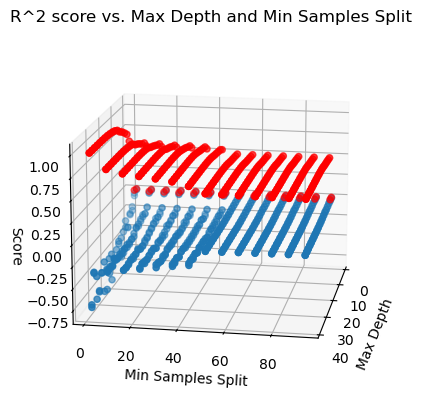

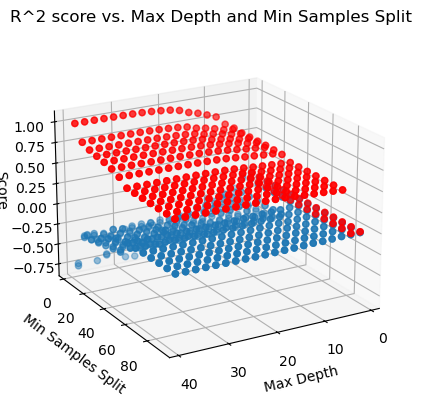

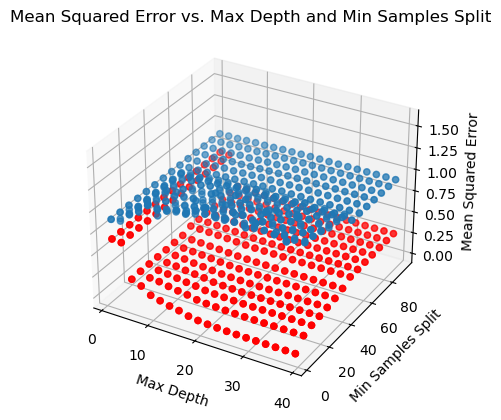

In [58]:
# plot a 3d scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(max_depths, min_samples_splits, scores)
ax.set_xlabel('Max Depth')
ax.set_ylabel('Min Samples Split')
ax.set_zlabel('Score')
# add another set of scores. plot in a different color
new_scores = scores_train
ax.scatter(max_depths, min_samples_splits, new_scores, c='r')
# name the plot
plt.title("R^2 score vs. Max Depth and Min Samples Split")
ax.view_init(15, 10)
plt.show()

#show a new perspective, rotated 90 degrees
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(max_depths, min_samples_splits, scores)
ax.set_xlabel('Max Depth')
ax.set_ylabel('Min Samples Split')
ax.set_zlabel('Score')
# add another set of scores. plot in a different color
new_scores = scores_train
ax.scatter(max_depths, min_samples_splits, new_scores, c='r')
# name the plot
plt.title("R^2 score vs. Max Depth and Min Samples Split")
ax.view_init(20, 60)
plt.show()

# plot a 3d scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(max_depths, min_samples_splits, mse_list)
ax.set_xlabel('Max Depth')
ax.set_ylabel('Min Samples Split')
ax.set_zlabel('Mean Squared Error')
new_mse_list = mse_train_list
ax.scatter(max_depths, min_samples_splits, new_mse_list, c='r')
# name the plot
plt.title("Mean Squared Error vs. Max Depth and Min Samples Split")
plt.show()


In [62]:
# Now, let's use the test data
# max_depth': 1, 'min_samples_split': 37, 'criterion': 'friedman_mse'
bestest_tree = tree.DecisionTreeRegressor(criterion="friedman_mse", splitter="best", max_depth=1, min_samples_split=37)
bestest_tree.fit(X_train, y_train)
print(f"test accuracy: {bestest_tree.score(X_test, y_test)}")


test accuracy: -0.0019975711494284454
